In [1]:
import ScraperFC
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import math
from highlight_text import fig_text
import requests
from bs4 import BeautifulSoup
from mplsoccer import Pitch, add_image, VerticalPitch, FontManager
import numpy as np

In [2]:
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'

from mplsoccer import FontManager
from matplotlib.colors import LinearSegmentedColormap

monoBFont = FontManager(spaceMono_bold)

In [3]:
html = requests.get("https://fbref.com/en/comps/1/schedule/World-Cup-Scores-and-Fixtures")
soup = BeautifulSoup(html.content, 'html.parser')
urls = []
for td in soup.find_all("tbody")[0].find_all('td',class_="right"):
    if td.find("a"):
        link = "https://fbref.com/" + td.find("a")["href"]
        urls.append(link)

In [4]:
urls = set(urls)
urls.remove('https://fbref.com//en/squads/6a08f71e/IR-Iran-Men-Stats')
urls.remove('https://fbref.com//en/squads/6e84edac/Saudi-Arabia-Men-Stats')
urls.remove('https://fbref.com//en/squads/9349828d/Ghana-Men-Stats')
urls.remove('https://fbref.com//en/squads/896550da/Cameroon-Men-Stats')
urls.remove('https://fbref.com//en/squads/870e020f/Uruguay-Men-Stats')
urls.remove('https://fbref.com//en/squads/b1bbcad3/Wales-Men-Stats')
urls.remove('https://fbref.com//en/squads/1d6f5c9b/Serbia-Men-Stats')
urls.remove('https://fbref.com//en/squads/1ea5ab66/Costa-Rica-Men-Stats')
urls.remove('https://fbref.com//en/squads/9b696ed1/Qatar-Men-Stats')
urls.remove('https://fbref.com//en/squads/9c6d90a0/Canada-Men-Stats')
urls.remove('https://fbref.com//en/squads/c1e40422/Germany-Men-Stats')
urls.remove('https://fbref.com//en/squads/29a4e4af/Denmark-Men-Stats')
urls.remove('https://fbref.com//en/squads/123acaf8/Ecuador-Men-Stats')
urls.remove('https://fbref.com//en/squads/361422b9/Belgium-Men-Stats')
urls.remove('https://fbref.com//en/squads/b009a548/Mexico-Men-Stats')
urls.remove("https://fbref.com//en/squads/a7c7562a/Tunisia-Men-Stats")

In [19]:
teams[-1] = "Korea"
teams[-2] = 'Argentina'
teams

['Senegal',
 'Poland',
 'Netherlands',
 'Australia',
 'Brazil',
 'United',
 'France',
 'Croatia',
 'Japan',
 'Portugal',
 'England',
 'Morocco',
 'Spain',
 'Switzerland',
 'Argentina',
 'Korea']

In [18]:
urls[-1] = urls[-2]
urls[-2] =  'https://fbref.com//en/squads/f9fddd6e/Argentina-Men-Stats'
urls

['https://fbref.com//en/squads/9ab5c684/Senegal-Men-Stats',
 'https://fbref.com//en/squads/8912dcf0/Poland-Men-Stats',
 'https://fbref.com//en/squads/5bb5024a/Netherlands-Men-Stats',
 'https://fbref.com//en/squads/b90bf4f9/Australia-Men-Stats',
 'https://fbref.com//en/squads/304635c3/Brazil-Men-Stats',
 'https://fbref.com//en/squads/0f66725b/United-States-Men-Stats',
 'https://fbref.com//en/squads/b1b36dcd/France-Men-Stats',
 'https://fbref.com//en/squads/7b08e376/Croatia-Men-Stats',
 'https://fbref.com//en/squads/ffcf1690/Japan-Men-Stats',
 'https://fbref.com//en/squads/4a1b4ea8/Portugal-Men-Stats',
 'https://fbref.com//en/squads/1862c019/England-Men-Stats',
 'https://fbref.com//en/squads/af41ccda/Morocco-Men-Stats',
 'https://fbref.com//en/squads/b561dd30/Spain-Men-Stats',
 'https://fbref.com//en/squads/81021a70/Switzerland-Men-Stats',
 'https://fbref.com//en/squads/f9fddd6e/Argentina-Men-Stats',
 'https://fbref.com//en/squads/473f0fbf/Korea-Republic-Men-Stats']

In [20]:
from urllib.request import urlopen
from PIL import Image

mark_urls = [
"https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Senegal.svg/1200px-Flag_of_Senegal.svg.png" 
,"https://upload.wikimedia.org/wikipedia/en/thumb/1/12/Flag_of_Poland.svg/1200px-Flag_of_Poland.svg.png"
,"https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/1200px-Flag_of_the_Netherlands.svg.png"
,"https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/1200px-Flag_of_Australia_%28converted%29.svg.png" 
,"https://upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/1200px-Flag_of_Brazil.svg.png"
,"https://upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/1200px-Flag_of_the_United_States.svg.png" 
,"https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/1200px-Flag_of_France.svg.png"
,"https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Croatia.svg/1200px-Flag_of_Croatia.svg.png"
,"https://upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/1200px-Flag_of_Japan.svg.png" 
,"https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/1200px-Flag_of_Portugal.svg.png"
,"https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Flag_of_England.svg/1200px-Flag_of_England.svg.png"
,"https://upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Morocco.svg/1200px-Flag_of_Morocco.svg.png"
,"https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Bandera_de_Espa%C3%B1a.svg/1200px-Bandera_de_Espa%C3%B1a.svg.png"
,"https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Flag_of_Switzerland_%28Pantone%29.svg/1200px-Flag_of_Switzerland_%28Pantone%29.svg.png"
,"https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/1200px-Flag_of_Argentina.svg.png"
,"https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/1200px-Flag_of_South_Korea.svg.png"
]

marks = []
for url in mark_urls:
    mark = Image.open(urlopen(url))
    marks.append(mark)

In [21]:
dfs = []
for url in urls:
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    # comment = re.compile('<!--|-->')
    # soup = BeautifulSoup(comment.sub("", html.text), 'lxml')
    table = soup.find_all('table')
    df = pd.read_html(table[0].prettify(), flavor='bs4')[0]
    df.fillna(0,inplace=True)
    dfs.append(df)

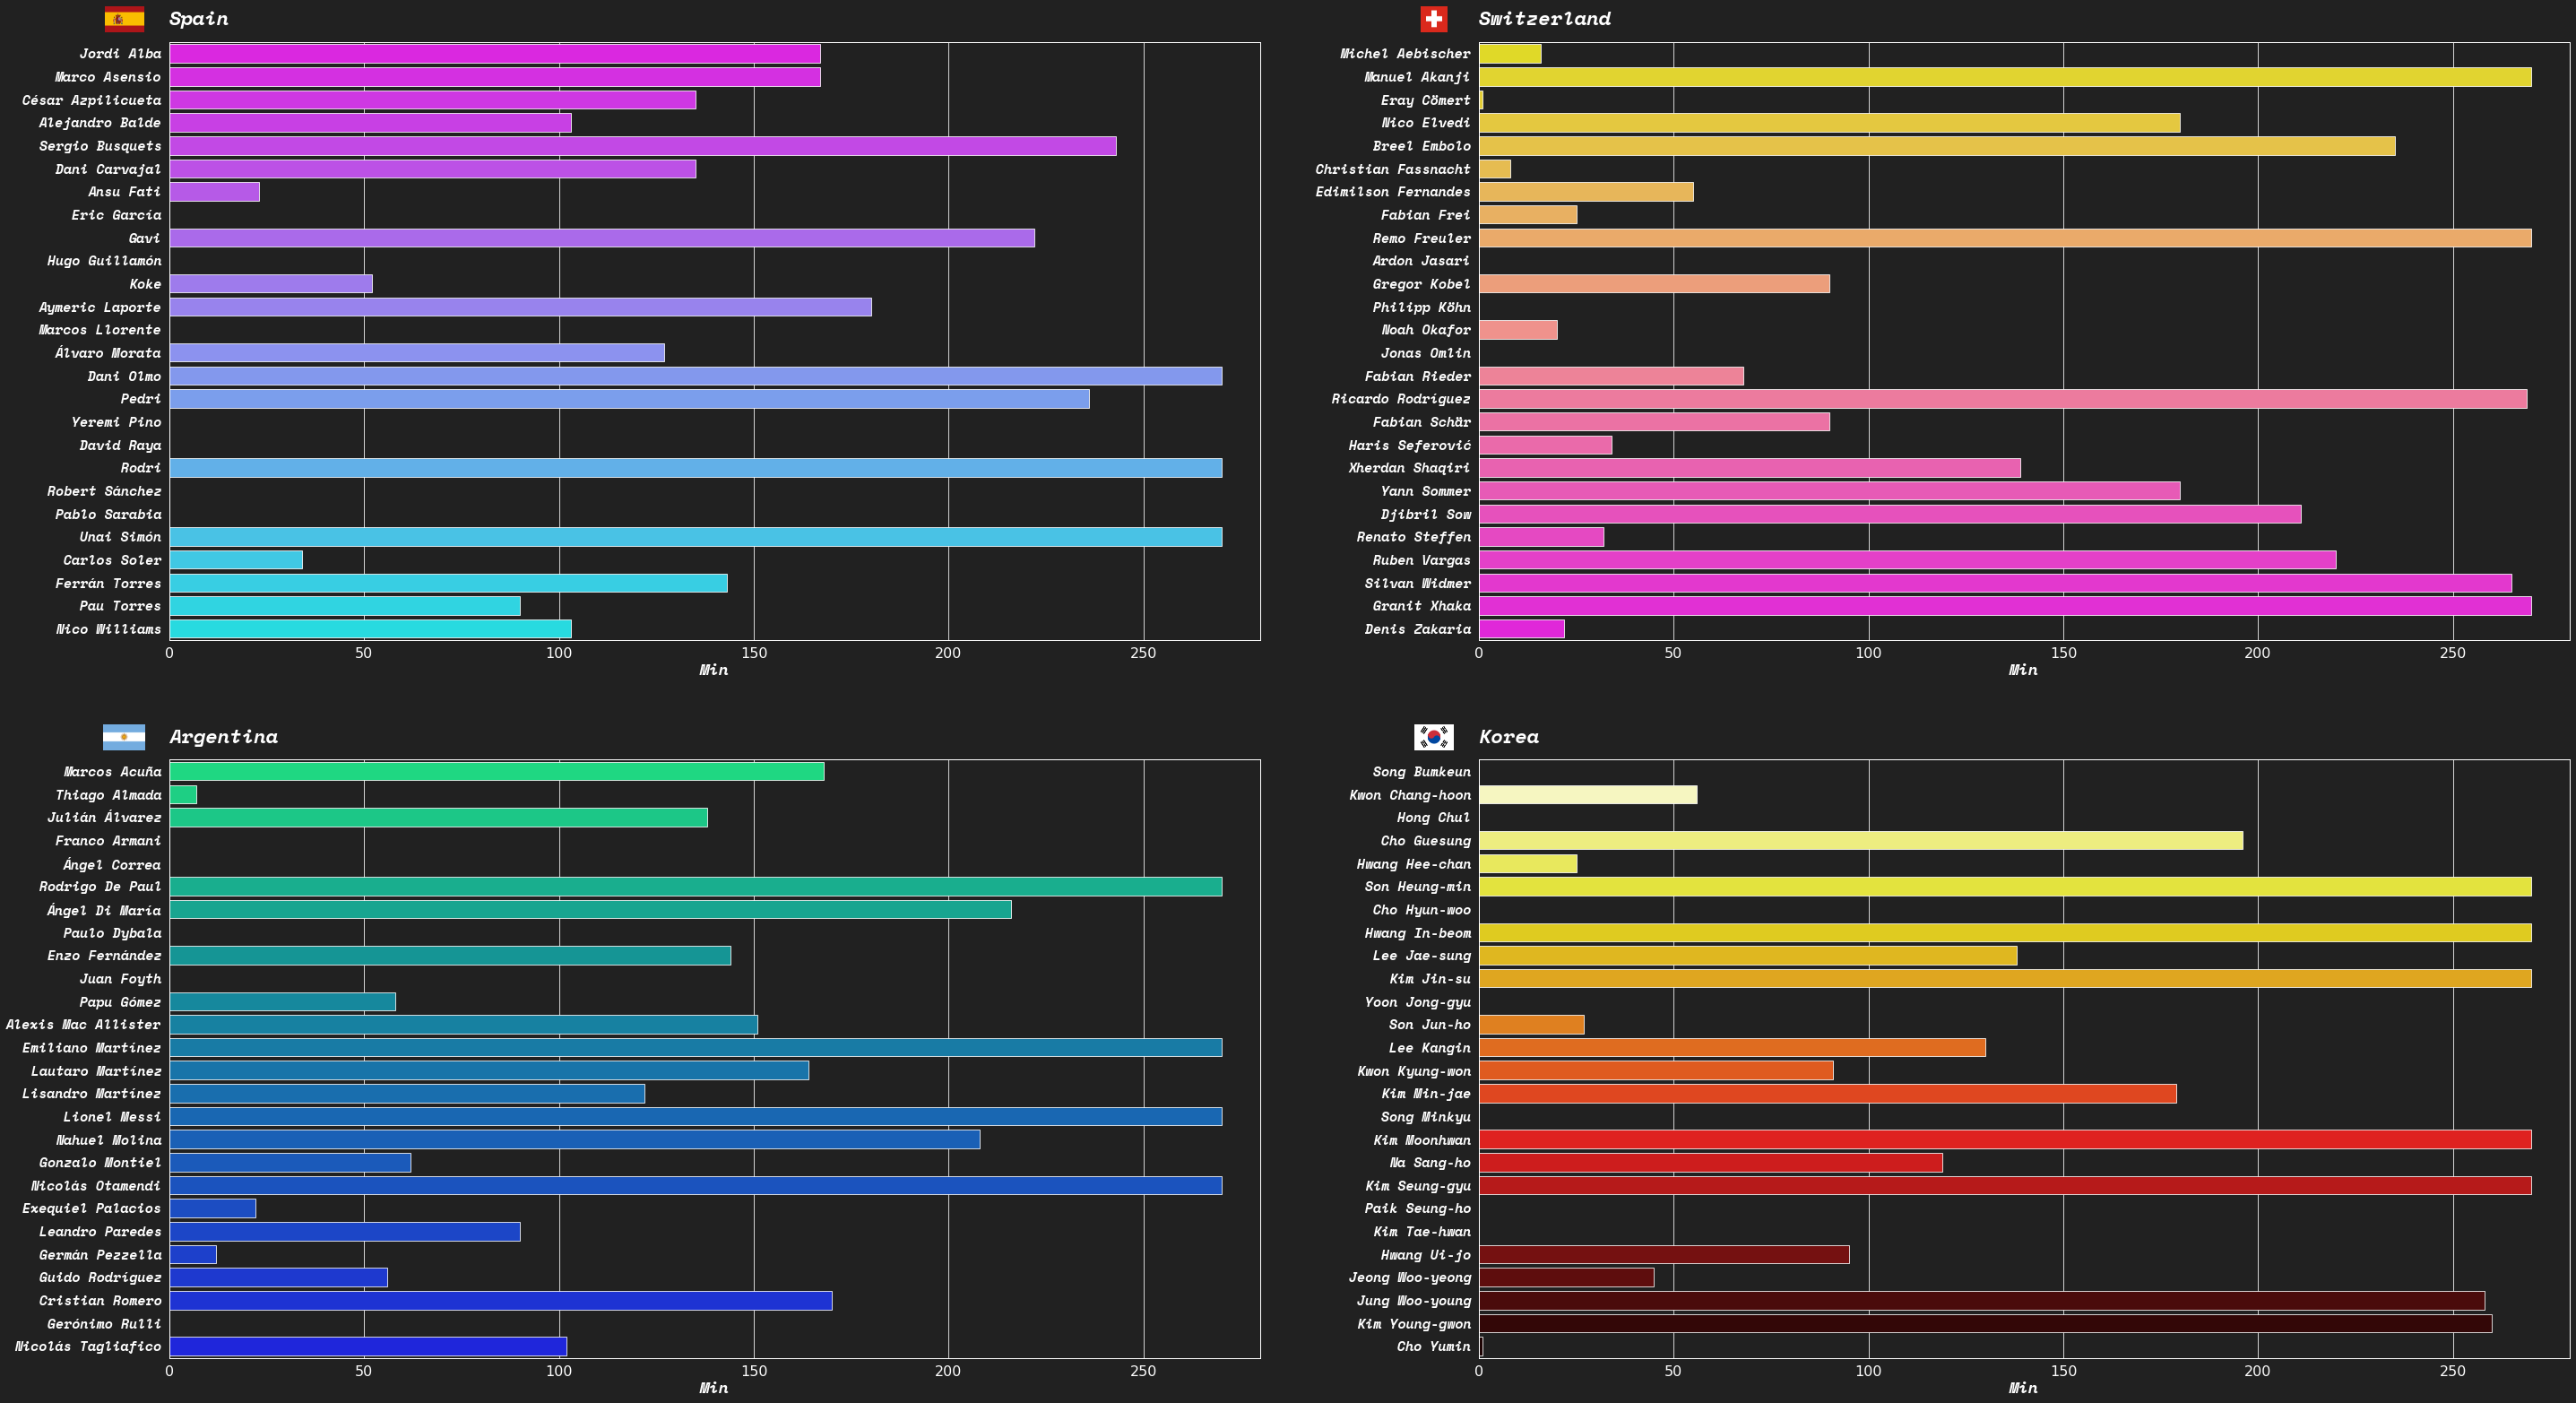

In [31]:
sns.set(style="darkgrid")
sns.set_context("paper", 2.5, {"lines.linewidth": 2})

for param in ['text.color', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '#fefefe'  

fig,axes = plt.subplots(2,2,figsize=(48,27))
fig_color = "#212121"
fig.set_facecolor(fig_color)

axes = axes.flatten()
col = "Min"
palettes = ["cool_r", "spring_r", "winter_r", "hot_r"]
for i in np.arange(0,4):
    sns.barplot(y="Player", x=col, orient="h", data=dfs[i+12], palette=sns.color_palette(palettes[i], 26), ax=axes[i])
#     sns.barplot(y="Player", x=col, orient="h", data=dfs[i+1], palette=sns.color_palette("spring_r", 26),ax=axes[i+4])
#     sns.barplot(y="Player", x=col, orient="h", data=dfs[i+2], palette=sns.color_palette("winter_r", 26),ax=axes[i+2])
#     sns.barplot(y="Player", x=col, orient="h", data=dfs[i+3], palette=sns.color_palette("hot_r", 26),ax=axes[i+3])
    
urls = list(urls)
teams = []
for url in urls:
    team = url.split("/")[-1].split("-")[0]
    teams.append(team)
    
teams[5] = "USA"
    
for i in np.arange(0,4):
    names = dfs[i+12]["Player"].unique()
#     print(len(names))
    axes[i].set_xlim((0,280))
    axes[i].set_facecolor(fig_color)
    axes[i].xaxis.label.set_color('white')
    axes[i].yaxis.label.set_color('white')  
    axes[i].xaxis.label.set_fontsize(14)  
    axes[i].set_xlabel("Min",fontsize=18,fontweight='bold',color="#fefefe",fontproperties=monoBFont.prop)
    axes[i].set_ylabel("",fontweight='bold')   
    axes[i].set_yticklabels(names,fontsize=15,fontweight="bold",fontproperties=monoBFont.prop)
#     axes[i].set_title(teams[i], fontweight='bold', fontsize=17, color="#fdc526")
    fig_text(s=f"<{teams[i+12]}>",
             x=axes[i].get_position().x0,y=axes[i].get_position().y1 +.0075,
             color="#8C898C",
             highlight_colors=["#ffffff"],
             highlight_weights=["bold"],
             highlight_styles=["italic"],
             fontsize=22,
             fontproperties=monoBFont.prop,fig=fig)
    for label in (axes[i].get_xticklabels()):
        label.set_fontsize(16)
        
    ax_image = add_image(
        marks[i+12], fig, left=axes[i].get_position().x0 - 0.022, bottom=axes[i].get_position().y1 +.0055, width=0.015, height=0.015)  
plt.savefig(f'/work/output/total_salary5.png', dpi=250, bbox_inches="tight")

In [12]:
teams

['Senegal',
 'Poland',
 'Netherlands',
 'Australia',
 'Brazil',
 'United',
 'France',
 'Croatia',
 'Japan',
 'Portugal',
 'England',
 'Morocco',
 'Spain',
 'Switzerland',
 'Korea',
 'Argentina']

In [19]:
mark_urls

['https://upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/1200px-Flag_of_the_United_States.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Flag_of_England.svg/1200px-Flag_of_England.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Flag_of_Switzerland_%28Pantone%29.svg/1200px-Flag_of_Switzerland_%28Pantone%29.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/1200px-Flag_of_Portugal.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Croatia.svg/1200px-Flag_of_Croatia.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Morocco.svg/1200px-Flag_of_Morocco.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/1200px-Flag_of_Australia_%28converted%29.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/1200px-Flag_of_Japan.svg.png',
 'https://upload

In [ ]:
sns.set(style="darkgrid")
season = 2021
league = "La Liga"
df1 = pd.read_csv(f"/work/assets/capology/salary/{league}/{season}/{season}_La Liga.csv")
col = "Annual Gross" 
df1[col]= df1[col].str.replace(',', '').str.lstrip('€').str.lstrip().astype('float') / 1000000
sturges = lambda n: math.ceil(math.log2(n*2))
struges_bin = sturges(len(df1[col]))
print(struges_bin)

season = 2022
league = "La Liga"
df2 = pd.read_csv(f"/work/assets/capology/salary/{league}/{season}/{season}_La Liga.csv")
col = "Annual Gross" 
df2[col]= df2[col].str.replace(',', '').str.lstrip('€').str.lstrip().astype('float') / 1000000
sturges = lambda n: math.ceil(math.log2(n*2))
struges_bin = sturges(len(df2[col]))
print(struges_bin)

season = 2023
league = "La Liga"
df3 = pd.read_csv(f"/work/assets/capology/salary/{league}/{season}/{season}_La Liga.csv")
col = "Annual Gross" 
df3[col]= df3[col].str.replace(',', '').str.lstrip('€').str.lstrip().astype('float') / 1000000
sturges = lambda n: math.ceil(math.log2(n*2))
struges_bin = sturges(len(df3[col]))
print(struges_bin)